# Analysis

1. Urban cities have a higher total number of rides and number of drivers per city compared to the other two types.
2. Urban rides make up over half of the percentage of total fares at 62%.
3. Rural drivers make up only 1% of total drivers. 

In [1]:
#Importing dependences
import os 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
city_data_file = "raw_data/city_data.csv"
ride_data_file = "raw_data/ride_data.csv"

In [2]:
#Reading csv files through pandas 
city_data = pd.read_csv(city_data_file)
ride_data = pd.read_csv(ride_data_file)

In [3]:
#Reading city data
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#Reading ride data 
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


# Pyber Ride Share Dataframe

In [5]:
#Grouped ride data to find average fare and total rides
ride_data_grouped = ride_data.groupby("city")
#Fare average per city
avg_fare = ride_data_grouped["fare"].mean()
#Total rides per city
total_rides = ride_data_grouped["ride_id"].count()
#Placing average fare and total rides into data frame to merge with city_data
ride_data_df = pd.DataFrame({"average fare":avg_fare,
                             "total rides": total_rides})
#Resetting the index back to city
ride_data_df.reset_index('city',inplace=True)
#Merging ride data with city data
pyber_data = pd.merge(ride_data_df, city_data, on="city",how="left")
pyber_data.head()

,city,average fare,total rides,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


# Pyber Bubble Plot

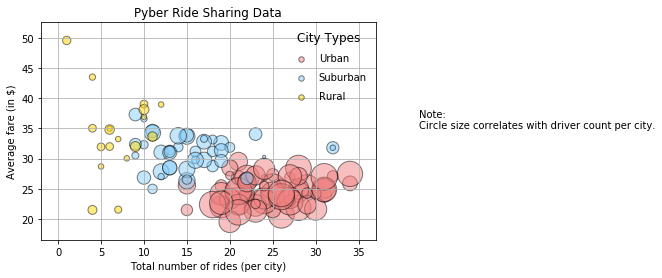

In [6]:
#Separating cities by their types
urban = pyber_data[pyber_data["type"] == "Urban"]
suburban = pyber_data[pyber_data["type"] == "Suburban"]
rural = pyber_data[pyber_data["type"] == "Rural"]
#Setting plots for each city type and the data for each type
plt.scatter(urban["total rides"], urban["average fare"],s=urban["driver_count"]*10,c="lightcoral",alpha=0.5,edgecolor="black",label="Urban")
plt.scatter(suburban["total rides"], suburban["average fare"], s=suburban["driver_count"]*10,c="lightskyblue",alpha=0.5,edgecolor="black",label="Suburban")
plt.scatter(rural["total rides"], rural["average fare"], s=rural["driver_count"]*10,c="gold",alpha=0.5,edgecolor="black",label="Rural")
#Legend info
legend = plt.legend(frameon=False,labelspacing=0.9)
legend.set_title("City Types", prop = {'size':12})
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]
plt.xlim(min(pyber_data["total rides"])-3, max(pyber_data["total rides"])+3)
plt.ylim(min(pyber_data["average fare"])-3, max(pyber_data["average fare"])+3)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average fare (in $)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.grid()
plt.savefig("data_plots/Bubble_Plot.png")
plt.show()


# Total Fare by City Type

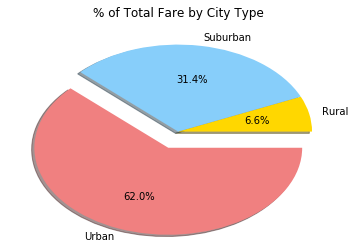

In [7]:
#Merging the two csv's into one table
city_ride_data = pd.merge(ride_data,city_data, how = "left",on=["city","city"])
#Grouping by city type
fare_by_type = city_ride_data.groupby("type")
#Finding the contribution of each city type's contribution in average fares
type_fare_percent = (100 * fare_by_type["fare"].sum()/city_ride_data["fare"].sum())
#Plotting out the chart 
plt.pie(type_fare_percent,labels=["Rural","Suburban","Urban"], explode=[0,0,0.2],colors=["gold","lightskyblue","lightcoral"],autopct='%1.1f%%',shadow=True)
plt.title("% of Total Fare by City Type")
plt.savefig("data_plots/Total_Fare_By_City_Type.png")
plt.show()

# Total Rides by City Type

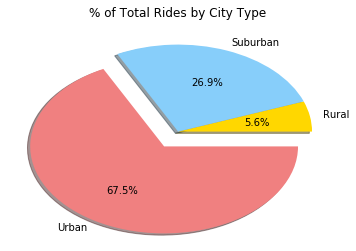

In [8]:
#Reusing the merged city_data and ride_data
rides_by_type = city_ride_data.groupby("type")
#Finding the percentage of rides per city type 
type_rides_percent = (100 * rides_by_type["ride_id"].sum()/city_ride_data["ride_id"].sum())
#Plotting out the chart 
plt.pie(type_rides_percent,labels=["Rural","Suburban","Urban"], explode=[0,0,0.2],colors=["gold","lightskyblue","lightcoral"],autopct='%1.1f%%',shadow=True)
plt.title("% of Total Rides by City Type")
plt.savefig("data_plots/Total_Rides_By_City_Type.png")
plt.show()

# Total Drivers by City Type

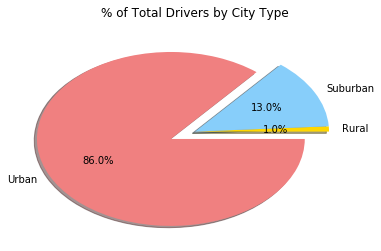

In [9]:
#Reusing the merged city_data and ride_data
drivers_by_type = city_ride_data.groupby("type")
#Finding the percentage of rides per city type 
type_drivers_percent = (100 * drivers_by_type["driver_count"].sum()/city_ride_data["driver_count"].sum())
#Plotting out the chart 
plt.pie(type_drivers_percent,labels=["Rural","Suburban","Urban"], explode=[0,0,0.2],colors=["gold","lightskyblue","lightcoral"],autopct='%1.1f%%',shadow=True)
plt.title("% of Total Drivers by City Type")
plt.savefig("data_plots/Total_Drivers_By_City_Type.png")
plt.show()